To query data in InfluxDB : [command line interface](https://docs.influxdata.com/influxdb/v2.0/) or [API client libraries](https://docs.influxdata.com/influxdb/v2.0/tools/client-libraries/).

This notebook is a tutorial for `influxdb-client`, the InfluxDB 2.0 Python library.
- https://pypi.org/project/influxdb-client/

- GitHub https://github.com/influxdata/influxdb-client-python


## Dependencies
```python
# -----------------------------------------------
# ION InfluxDB 2.0 Tutorial
# Author: Jiachen Wei, UBC Urban Data Lab
# Date: Mar 2021
# Python version: 3.8.5
# -----------------------------------------------

#influxdb-client for InfluxDB 2.x and InfluxDB 1.8+
# More information https://pypi.org/project/influxdb-client/
! pip install influxdb-client
```


In [1]:
import pandas as pd
import influxdb_client
from datetime import timezone, datetime
import pytz
import matplotlib.pyplot as plt
%matplotlib inline

## Connecting and Querying UDL's InfluxDB

Let's query the data on electricity power in the AERL building for July 2020. You can see the same results using our **[InfluxDB 2.0 User Interface](http://206.12.92.81:8086/)**

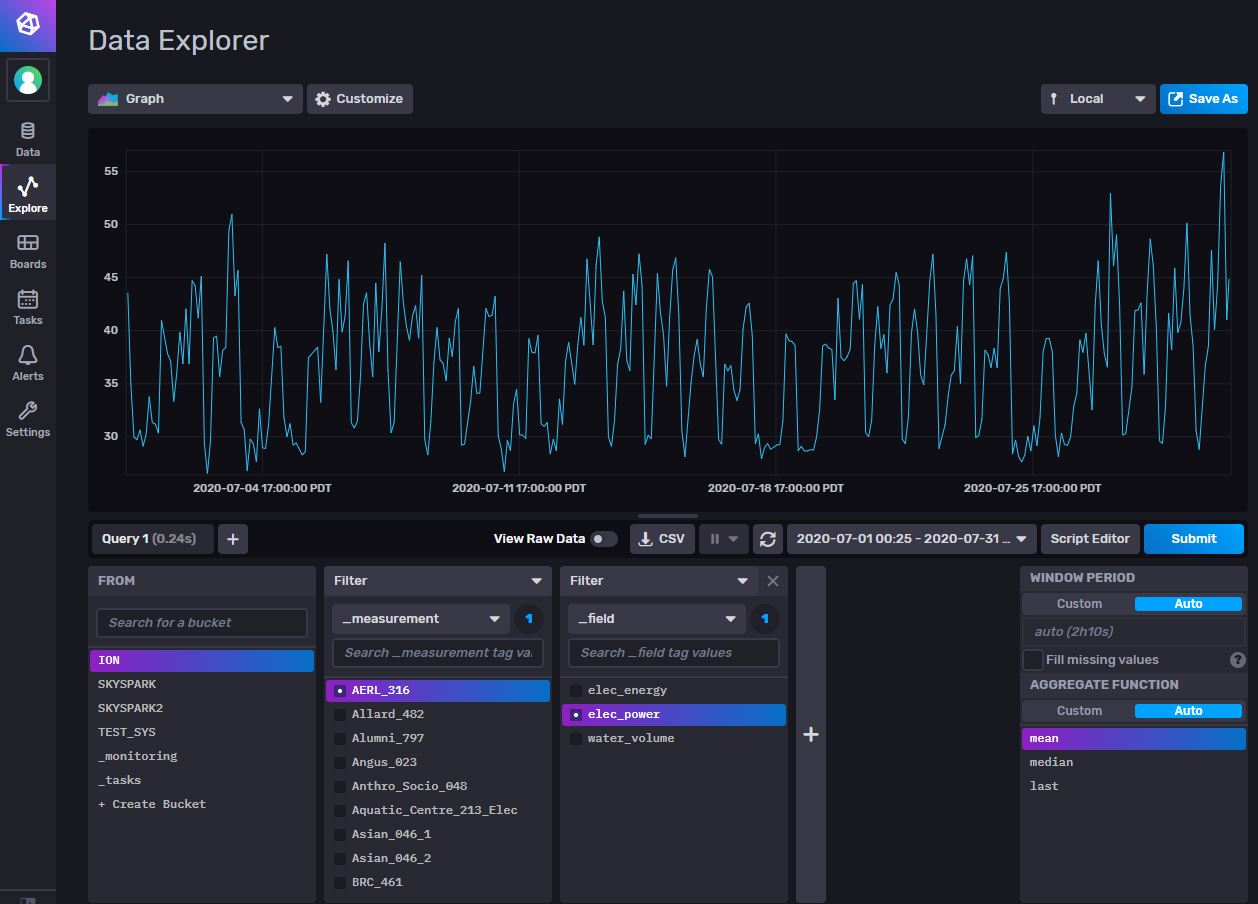

In [2]:
#Define a few variables with the name of your bucket, organization, and token.
bucket = "ION"
org = "UBC"
#UDL provides public users READ access to the InfluxDB 2.0 instance via this token
token = "omUybYZ3QkGvuXXy0VwT-7hoO2SEFzhckXJ5k32K_GvG47yHQAi9JzZ1bii6r1HD5NKux3ZhHlKAyUfj6i61bA=="
url="http://206.12.92.81:8086/"

In [3]:
#Instantiate the client.
client = influxdb_client.InfluxDBClient(url=url, token=token, org=org)

#Create a Flux query.
    #Flux documentation https://docs.influxdata.com/influxdb/v2.0/reference/flux/
    #You can generate Flux query using the Query Builder on http://206.12.92.81:8086/
query = '''from(bucket: "ION")
  |> range(start: 2020-07-01T00:00:00Z, stop: 2020-07-31T23:59:59Z)
  |> filter(fn: (r) => r["_measurement"] == "AERL_316")
  |> filter(fn: (r) => r["_field"] == "elec_power")'''

##Instantiate the query client. Specify org and query.
result = client.query_api().query_data_frame(org=org, query=query)

In [4]:
pd.options.display.max_rows = 5
pd.options.display.max_columns = None
result

result table                    _start                     _stop  \
0      _result     0 2020-07-01 00:00:00+00:00 2020-07-31 23:59:59+00:00   
1      _result     0 2020-07-01 00:00:00+00:00 2020-07-31 23:59:59+00:00   
...        ...   ...                       ...                       ...   
10632  _result     0 2020-07-01 00:00:00+00:00 2020-07-31 23:59:59+00:00   
10633  _result     0 2020-07-01 00:00:00+00:00 2020-07-31 23:59:59+00:00   

                                 _time     _value      _field _measurement  
0     2020-07-01 00:06:02.080546+00:00  31.879992  elec_power     AERL_316  
1     2020-07-01 00:11:37.278392+00:00  34.307949  elec_power     AERL_316  
...                                ...        ...         ...          ...  
10632 2020-07-31 23:45:34.732205+00:00  34.053326  elec_power     AERL_316  
10633 2020-07-31 23:53:14.671552+00:00  38.653465  elec_power     AERL_316  

[10634 rows x 8 columns]

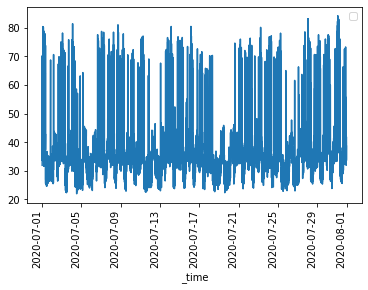

In [5]:
import warnings
warnings.filterwarnings("ignore")

result.plot.line(x='_time', y='_value')
plt.xticks(rotation='vertical')
plt.show()